### K - Nearest Neighbor Solution

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### Reading the data

In [2]:
from matplotlib import pyplot as plt
from matplotlib import style
from tqdm import tqdm
import numpy as np
import pandas as pd

In [3]:
style.use(style='seaborn-whitegrid')

In [4]:
processed_df = pd.read_csv(filepath_or_buffer='preprocessed_data.csv', nrows=5000)

In [5]:
y = processed_df['project_is_approved'].values
X = processed_df.drop(labels=['project_is_approved'], axis=1)

#### Train, Test → Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [8]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [9]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(2244, 8) (2244,)
(1106, 8) (1106,)
(1650, 8) (1650,)


#### BoW - `CountVectorizer`

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

Toy example

In [11]:
ex = [
    "classroom students should take break",
    "low income homes students receive free breakfast",
    "students will receive low grades"
]

In [12]:
vect = CountVectorizer()
vect.fit(raw_documents=ex)

CountVectorizer()

In [13]:
print(vect.get_feature_names_out())

['break' 'breakfast' 'classroom' 'free' 'grades' 'homes' 'income' 'low'
 'receive' 'should' 'students' 'take' 'will']


In [14]:
print(vect.transform(raw_documents=ex).toarray())

[[1 0 1 0 0 0 0 0 0 1 1 1 0]
 [0 1 0 1 0 1 1 1 1 0 1 0 0]
 [0 0 0 0 1 0 0 1 1 0 1 0 1]]


Vectorizing `essay`

In [15]:
vect = CountVectorizer(min_df=10, ngram_range=(1, 4), max_features=5000)
vect.fit(raw_documents=X_train['essay'].values)

CountVectorizer(max_features=5000, min_df=10, ngram_range=(1, 4))

In [16]:
X_train_essay_bow = vect.transform(raw_documents=X_train['essay'].values)
X_cv_essay_bow = vect.transform(raw_documents=X_cv['essay'].values)
X_test_essay_bow = vect.transform(raw_documents=X_test['essay'].values)

In [17]:
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)

(2244, 5000) (2244,)
(1106, 5000) (1106,)
(1650, 5000) (1650,)


Vectorizing `school_state`

In [18]:
vect = CountVectorizer()
vect.fit(raw_documents=X_train['school_state'].values)

CountVectorizer()

In [19]:
X_train_state_bow = vect.transform(raw_documents=X_train['school_state'].values)
X_cv_state_bow = vect.transform(raw_documents=X_cv['school_state'].values)
X_test_state_bow = vect.transform(raw_documents=X_test['school_state'].values)

In [20]:
print(X_train_state_bow.shape, y_train.shape)
print(X_cv_state_bow.shape, y_cv.shape)
print(X_test_state_bow.shape, y_test.shape)

(2244, 50) (2244,)
(1106, 50) (1106,)
(1650, 50) (1650,)


In [21]:
print(vect.get_feature_names_out())

['ak' 'al' 'ar' 'az' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id'
 'il' 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc'
 'nd' 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'va' 'vt' 'wa' 'wi' 'wv']


Vectorizing `teacher_prefix`

In [22]:
vect = CountVectorizer()
vect.fit(raw_documents=X_train['teacher_prefix'].values)

CountVectorizer()

In [23]:
X_train_teacher_bow = vect.transform(raw_documents=X_train['teacher_prefix'].values)
X_cv_teacher_bow = vect.transform(raw_documents=X_cv['teacher_prefix'].values)
X_test_teacher_bow = vect.transform(raw_documents=X_test['teacher_prefix'].values)

In [24]:
print(X_train_teacher_bow.shape, y_train.shape)
print(X_cv_teacher_bow.shape, y_cv.shape)
print(X_test_teacher_bow.shape, y_test.shape)

(2244, 4) (2244,)
(1106, 4) (1106,)
(1650, 4) (1650,)


In [25]:
print(vect.get_feature_names_out())

['mr' 'mrs' 'ms' 'teacher']


Vectorizing `project_grade_category`

In [26]:
vect = CountVectorizer()
vect.fit(raw_documents=X_train['project_grade_category'].values)

CountVectorizer()

In [27]:
X_train_grade_bow = vect.transform(raw_documents=X_train['project_grade_category'].values)
X_cv_grade_bow = vect.transform(raw_documents=X_cv['project_grade_category'].values)
X_test_grade_bow = vect.transform(raw_documents=X_test['project_grade_category'].values)

In [28]:
print(X_train_grade_bow.shape, y_train.shape)
print(X_cv_grade_bow.shape, y_cv.shape)
print(X_test_grade_bow.shape, y_test.shape)

(2244, 4) (2244,)
(1106, 4) (1106,)
(1650, 4) (1650,)


In [29]:
print(vect.get_feature_names_out())

['grades_3_5' 'grades_6_8' 'grades_9_12' 'grades_prek_2']


Vectorizing `price`

In [30]:
print(X_train['price'].values)

[ 232.98 1098.98   83.97 ...  145.95  246.38  106.49]


In [31]:
print(X_train['price'].values.reshape(-1, 1))

[[ 232.98]
 [1098.98]
 [  83.97]
 ...
 [ 145.95]
 [ 246.38]
 [ 106.49]]


In [32]:
print(X_train['price'].values.reshape(1, -1))

[[ 232.98 1098.98   83.97 ...  145.95  246.38  106.49]]


In [33]:
from sklearn.preprocessing import Normalizer

In [34]:
norm = Normalizer()
try:
    norm.fit(X=X_train['price'].values.reshape(1, 1))
except:
    pass

In [35]:
X_train_price_norm = norm.transform(X=X_train['price'].values.reshape(1, -1)).reshape(-1, 1)
X_cv_price_norm = norm.transform(X=X_cv['price'].values.reshape(1, -1)).reshape(-1, 1)
X_test_price_norm = norm.transform(X=X_test['price'].values.reshape(1, -1)).reshape(-1, 1)

In [36]:
print(X_train_price_norm)
print(X_cv_price_norm)
print(X_test_price_norm)

[[0.01020572]
 [0.04814097]
 [0.00367832]
 ...
 [0.00639336]
 [0.01079271]
 [0.00466481]]
[[0.01758651]
 [0.01308892]
 [0.00791715]
 ...
 [0.02119353]
 [0.03122004]
 [0.01314878]]
[[0.00287438]
 [0.00536718]
 [0.02021175]
 ...
 [0.01337452]
 [0.05684231]
 [0.0180217 ]]


In [37]:
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)

(2244, 1) (2244,)
(1106, 1) (1106,)
(1650, 1) (1650,)


#### Combine all the features

In [38]:
from scipy.sparse import hstack

In [39]:
X_train_data = hstack(
    blocks=(X_train_essay_bow,
            X_train_state_bow,
            X_train_teacher_bow,
            X_train_grade_bow,
            X_train_price_norm)).tocsr()
X_cv_data = hstack(
    blocks=(X_cv_essay_bow,
            X_cv_state_bow,
            X_cv_teacher_bow,
            X_cv_grade_bow,
            X_cv_price_norm)).tocsr()
X_test_data = hstack(
    blocks=(X_test_essay_bow,
            X_test_state_bow,
            X_test_teacher_bow,
            X_test_grade_bow,
            X_test_price_norm)).tocsr()

In [40]:
print(X_train_data.shape, y_train.shape)
print(X_cv_data.shape, y_cv.shape)
print(X_test_data.shape, y_test.shape)

(2244, 5059) (2244,)
(1106, 5059) (1106,)
(1650, 5059) (1650,)


#### Classification Solutions

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [42]:
def batch_proba_predict(clf, data, batch_size=1000):
    """
    This function takes the input in batches and predicts the probability scores for positive class.
    """
    y_data_pred_prob = list()
    tr_loop = (data.shape[0] - (data.shape[0] % batch_size))
    for i in range(0, tr_loop, batch_size):
        y_data_pred_prob.extend(clf.predict_proba(X=data[i:i+batch_size])[:, 1])
    if data.shape[0] % batch_size != 0:
        y_data_pred_prob.extend(clf.predict_proba(X=data[tr_loop:])[:, 1])
    return y_data_pred_prob

#### Simple KNN

In [43]:
def simple_knn(Ks, X_train_data, X_cv_data, y_train, y_cv):
    """
    Implements KNN.
    """
    train_auc = list()
    cv_auc = list()

    for k in tqdm(Ks):
        clf = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        clf.fit(X=X_train_data, y=y_train)

        y_train_pred_proba = batch_proba_predict(clf=clf, data=X_train_data)
        y_cv_pred_proba = batch_proba_predict(clf=clf, data=X_cv_data)

        train_auc.append(roc_auc_score(y_true=y_train, y_score=y_train_pred_proba))
        cv_auc.append(roc_auc_score(y_true=y_cv, y_score=y_cv_pred_proba))

    plt.figure(figsize=(12, 6))

    plt.plot(Ks, train_auc, label='Train AUC')
    plt.plot(Ks, cv_auc, label='CV AUC')

    plt.scatter(Ks, train_auc, label='Train AUC Points')
    plt.scatter(Ks, cv_auc, label='CV AUC Points')

    plt.title(label='Hyperparameter vs AUC Plot')
    plt.xlabel(xlabel='K: Hyperparameter')
    plt.ylabel(ylabel='AUC')
    plt.legend()
    plt.show()

100%|█████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.00it/s]


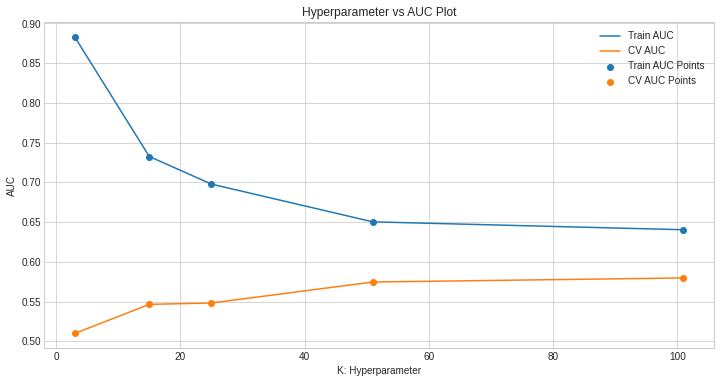

In [44]:
simple_knn(Ks=[3, 15, 25, 51, 101], X_train_data=X_train_data, X_cv_data=X_cv_data, y_train=y_train, y_cv=y_cv)

#### KNN GridSearchCV

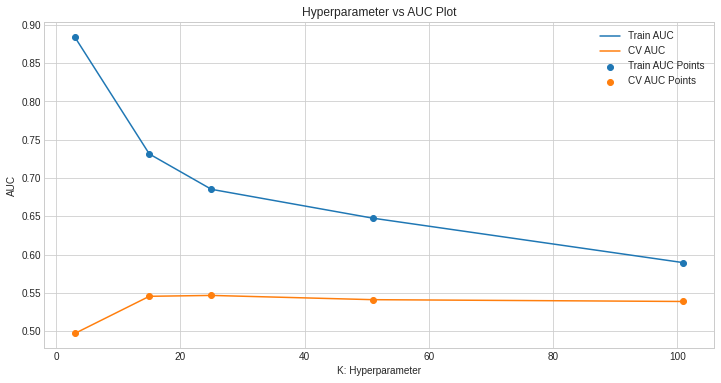

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001828,0.000147,0.045274,0.000765,3,{'n_neighbors': 3},0.522160,0.473256,0.495310,0.496909,0.019997,5,0.878278,0.899084,0.875469,0.884277,0.010533
1,0.001424,0.000076,0.048020,0.002139,15,{'n_neighbors': 15},0.533912,0.531960,0.570539,0.545470,0.017744,2,0.736779,0.718692,0.738881,0.731451,0.009062
2,0.001363,0.000076,0.046603,0.002512,25,{'n_neighbors': 25},0.549259,0.535177,0.555435,0.546624,0.008477,1,0.694408,0.679483,0.681817,0.685236,0.006555
3,0.001527,0.000211,0.048872,0.004651,51,{'n_neighbors': 51},0.535610,0.509190,0.578389,0.541063,0.028512,3,0.645516,0.636230,0.660851,0.647532,0.010152
4,0.001406,0.000128,0.049933,0.004713,101,{'n_neighbors': 101},0.535494,0.541026,0.539612,0.538711,0.002347,4,0.583192,0.588115,0.596923,0.589410,0.005680


In [45]:
knn_clf = KNeighborsClassifier(n_jobs=-1)
parameters = {'n_neighbors' : [3, 15, 25, 51, 101]}

clf = GridSearchCV(estimator=knn_clf, param_grid=parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X=X_train_data, y=y_train)

results = pd.DataFrame.from_dict(data=clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])

train_auc = results['mean_train_score']
train_auc_std = results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std = results['std_test_score']
Ks = results['param_n_neighbors']

plt.figure(figsize=(12, 6))

plt.plot(Ks, train_auc, label='Train AUC')
plt.plot(Ks, cv_auc, label='CV AUC')

plt.scatter(Ks, train_auc, label='Train AUC Points')
plt.scatter(Ks, cv_auc, label='CV AUC Points')

plt.title(label='Hyperparameter vs AUC Plot')
plt.xlabel(xlabel='K: Hyperparameter')
plt.ylabel(ylabel='AUC')
plt.legend()
plt.show()

display(results)

In [46]:
def draw_auc(best_k, X_train_data, X_test_data, y_train, y_test, plot_it=True):
    """
    Draws AUC.
    """    
    knn_clf = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
    knn_clf.fit(X=X_train_data, y=y_train)

    y_train_pred_proba = batch_proba_predict(clf=knn_clf, data=X_train_data)
    y_test_pred_proba = batch_proba_predict(clf=knn_clf, data=X_test_data)

    train_fpr, train_tpr, train_taus = roc_curve(y_true=y_train, y_score=y_train_pred_proba)
    test_fpr, test_tpr, test_taus = roc_curve(y_true=y_test, y_score=y_test_pred_proba)
    
    if plot_it:
        tr_auc = round(auc(x=train_fpr, y=train_tpr), 3)
        te_auc = round(auc(x=test_fpr, y=test_tpr), 3)
        
        plt.figure(figsize=(12, 6))

        plt.plot(train_fpr, train_tpr, label='Train AUC = {}'.format(tr_auc))
        plt.plot(test_fpr, test_tpr, label='Test AUC = {}'.format(te_auc))

        plt.title(label='AUC')
        plt.xlabel(xlabel='FPR')
        plt.ylabel(ylabel='TPR')
        plt.legend()
        plt.show()
    else:
        return (y_train_pred_proba, y_test_pred_proba, train_taus, train_fpr, train_tpr)

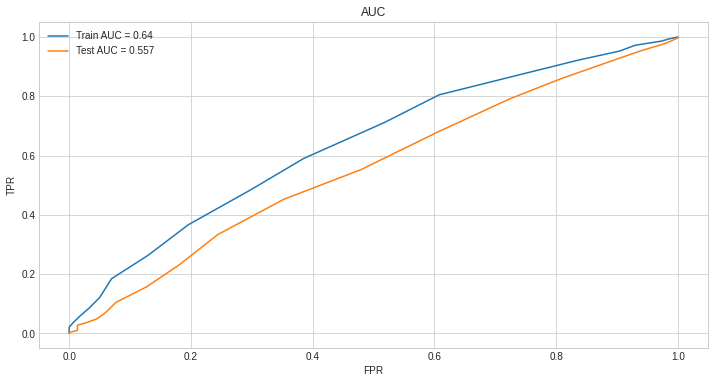

In [47]:
draw_auc(best_k=101, X_train_data=X_train_data, X_test_data=X_test_data, y_train=y_train, y_test=y_test)

In [48]:
def find_best_tau(taus, fpr, tpr):
    """
    The (tpr*(1-fpr)) will be maximum if fpr is very low and tpr is very high.
    """
    tau = round(taus[np.argmax(a=tpr*(1-fpr))], 3)
    tpr_1_fpr = round(max(tpr*(1-fpr)), 3)
    print("The maximum value of tpr*(1-fpr) is {} for tau {}.".format(tpr_1_fpr, tau))
    return tau

def predict_using_best_tau(proba, best_tau):
    """
    This function predicts using best tau.
    """
    predictions = list()
    for i in proba:
        if i >= best_tau:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [49]:
(y_train_pred_proba,
 y_test_pred_proba,
 train_taus,
 train_fpr,
 train_tpr) = draw_auc(best_k=101,
                       X_train_data=X_train_data,
                       X_test_data=X_test_data,
                       y_train=y_train,
                       y_test=y_test,
                       plot_it=False)

best_tau = find_best_tau(taus=train_taus, fpr=train_fpr, tpr=train_tpr)
print("\nTrain Confusion Matrix")
print(confusion_matrix(y_true=y_train,
                       y_pred=predict_using_best_tau(proba=y_train_pred_proba,
                                                     best_tau=best_tau)))
print("\nTest Confusion Matrix")
print(confusion_matrix(y_true=y_test,
                       y_pred=predict_using_best_tau(proba=y_test_pred_proba,
                                                     best_tau=best_tau)))

The maximum value of tpr*(1-fpr) is 0.363 for tau 0.822.

Train Confusion Matrix
[[ 211   90]
 [1000  943]]

Test Confusion Matrix
[[143  78]
 [782 647]]


#### Applying W2V model for `essay`

In [50]:
import pickle

In [51]:
with open(file='glove_vectors', mode='rb') as pkl:
    model = pickle.load(pkl)
    glove_words = set(model.keys())

In [52]:
def get_avg_w2v(data, dim=300):
    """
    This function gets the average w2v of the given data.
    """
    avg_w2v = list()
    for sentence in tqdm(data):
        vect = np.zeros(300)
        count_ = 0
        for word in sentence.split():
            if word in glove_words:
                vect += model[word]
                count_ += 1
        if count_ > 0:
            vect /= count_
        avg_w2v.append(vect)
    return avg_w2v

In [53]:
avg_w2v_train = get_avg_w2v(data=X_train['essay'].values)

100%|█████████████████████████████████████████████████████████████| 2244/2244 [00:00<00:00, 4597.32it/s]


In [54]:
print(len(avg_w2v_train))
print(len(avg_w2v_train[0]))

2244
300


In [55]:
avg_w2v_cv = get_avg_w2v(data=X_cv['essay'].values)

100%|█████████████████████████████████████████████████████████████| 1106/1106 [00:00<00:00, 5763.36it/s]


In [56]:
print(len(avg_w2v_cv))
print(len(avg_w2v_cv[0]))

1106
300


In [57]:
avg_w2v_test = get_avg_w2v(data=X_test['essay'].values)

100%|█████████████████████████████████████████████████████████████| 1650/1650 [00:00<00:00, 5612.10it/s]


In [58]:
print(len(avg_w2v_test))
print(len(avg_w2v_test[0]))

1650
300


In [59]:
X_train_data = hstack(
    blocks=(avg_w2v_train,
            X_train_state_bow,
            X_train_teacher_bow,
            X_train_grade_bow,
            X_train_price_norm)).tocsr()
X_cv_data = hstack(
    blocks=(avg_w2v_cv,
            X_cv_state_bow,
            X_cv_teacher_bow,
            X_cv_grade_bow,
            X_cv_price_norm)).tocsr()
X_test_data = hstack(
    blocks=(avg_w2v_test,
            X_test_state_bow,
            X_test_teacher_bow,
            X_test_grade_bow,
            X_test_price_norm)).tocsr()

100%|█████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.13s/it]


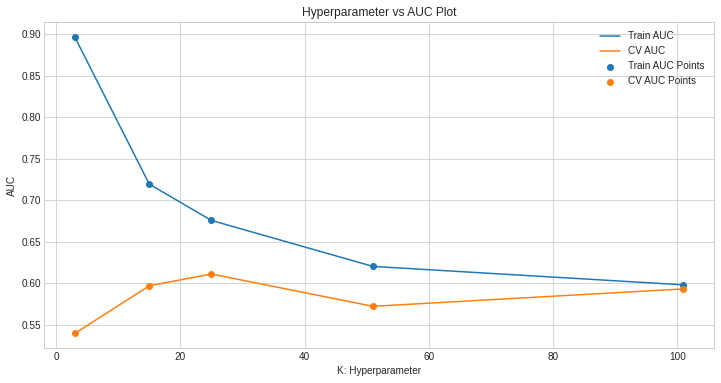

In [60]:
simple_knn(Ks=[3, 15, 25, 51, 101], X_train_data=X_train_data, X_cv_data=X_cv_data, y_train=y_train,y_cv=y_cv)

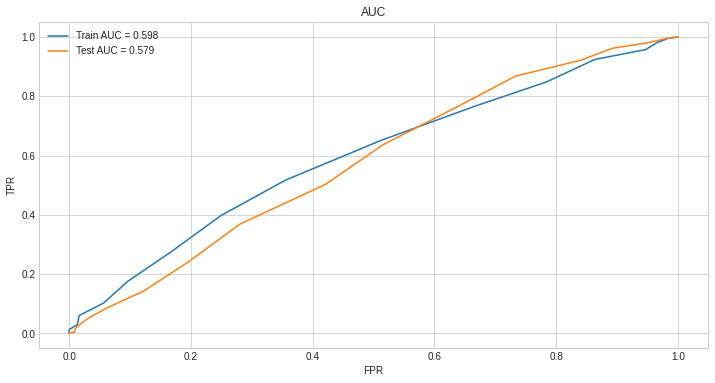

In [61]:
draw_auc(best_k=101, X_train_data=X_train_data, X_test_data=X_test_data, y_train=y_train, y_test=y_test)

In [62]:
(y_train_pred_proba,
 y_test_pred_proba,
 train_taus,
 train_fpr,
 train_tpr) = draw_auc(best_k=101,
                       X_train_data=X_train_data,
                       X_test_data=X_test_data,
                       y_train=y_train,
                       y_test=y_test,
                       plot_it=False)

best_tau = find_best_tau(taus=train_taus, fpr=train_fpr, tpr=train_tpr)
print("\nTrain Confusion Matrix")
print(confusion_matrix(y_true=y_train,
                       y_pred=predict_using_best_tau(proba=y_train_pred_proba,
                                                     best_tau=best_tau)))
print("\nTest Confusion Matrix")
print(confusion_matrix(y_true=y_test,
                       y_pred=predict_using_best_tau(proba=y_test_pred_proba,
                                                     best_tau=best_tau)))

The maximum value of tpr*(1-fpr) is 0.333 for tau 0.871.

Train Confusion Matrix
[[ 194  107]
 [ 938 1005]]

Test Confusion Matrix
[[128  93]
 [711 718]]


End of the file.